# Tagging

## Morphodita

MorphoDiTa: Morphological Dictionary and Tagger is an open-source tool for morphological analysis of natural language texts. It performs morphological analysis, morphological generation, tagging and tokenization and it is optimized for the Czech language, [Morphodita web](http://ufal.mff.cuni.cz/morphodita/) 

## Installation

We are going to install the tool and use the Python bindings.

Clone the repository

     git clone https://github.com/ufal/morphodita.git
     cd morphodita/src
     make

Install the Python bindings

     pip install ufal.morphodita

Requires python3.x-dev installed in the computer (I have cd into the `.build` directory under `morphodita\src`.

Download the [cz model](https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-1836)

      curl --remote-name-all https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-1836{/czech-morfflex-pdt-161115.zip}
      unzip czech-morfflex-pdt-161115.zip

The Morphodita Python model wraps the C++ library, here is the [C++ API](http://ufal.mff.cuni.cz/morphodita/api-reference#tokenizer_set_text)


___NOTE: For some reason in my environment (bash on Windows10) I can not load the dictionary or tagger file unless they are in the same directory and the python script, so I have copied them into the script directory. Problem may be related to path conversion in the C++ wrapper.___


In the example below we use Morphodita to lemmatize and tag a sample text. This example is adapted form https://pypi.org/project/ufal.morphodita/

__Hezké odpoledne, vážený pane předsedající, vážená vládo, kolegyně, kolegové. Nedá mi, abych nezareagoval na vystoupení pana předsedy Kováčika, který říkal, že jsme tu v historii měli různé počty. To je pravda. Ale ty počty se braly tak, aby vždy každá politická strana zvolená v Poslanecké sněmovně měla zastoupení v mandátovém a imunitním výboru. Máme za sebou sedm volebních období a ani jednou se nestalo, že by některý poslanecký klub neměl zastoupení v tomto výboru. A už máme jeden dobrý precedens z tohoto volebního období. V minulém volebním období jsme měli 15člennou volební komisi, a aby všechny strany měly zastoupení ve volební komisi, to znamená, aby se mohly vzájemně kontrolovat, když budou počítat hlasy, tak jsme před chvílí vzali na vědomí ustanovení 19členné volební komise. V tomto případě logicky vyšli ti, kteří mají nejvíc hlasů, vstříc těm, kteří mají nejméně hlasů. Tak jak je to logické u volební komise, tak je to logické i u mandátového a imunitního výboru. U všech jiných je to věc politické dohody a názory většiny. Tady, pokud projde návrh menší než 18, kterýkoliv, tak dva poslanecké kluby odřízne od informací. A i my ostatní, kteří budeme mít zastoupení v mandátovém a imunitním výboru, tak přece víme, že dostaneme jenom obecnou informaci od toho, co se ti členové výboru na tom jednání dozvědí. Nedostaneme konkrétní a nemůžeme to po nich ani chtít. Oni nám mohou jenom sdělit svůj názor a doporučit, jak postupovat, až budeme hlasovat o doporučení mandátového a imunitního výboru. Takže pokud jsme zřídili volební komisi tak, aby měly zastoupení logicky všechny poslanecké kluby, tak si myslím, že ve stejné logice bychom měli určit takový počet členů mandátového a imunitního výboru, aby tam opět měly zastoupení všechny poslanecké kluby. U ostatních výborů, a mluvila o tom i paní poslankyně Němcová, vlastně v zásadě neplatí tento argument. Protože tam jednak mohou chodit i z těch stran, které tam mají zastoupení, jiní poslanci, jednání jsou veřejná, záleží na aktivitě každého, zda tam vystoupí, nebo ne. Nepamatuji si případ, že by poslanec, který není členem výboru, nedostal slovo na jiném výboru. Myslím, že je to naprosto běžné, zdvořilé a že to bude pokračovat i v tomto volebním období.

In [48]:
from ufal.morphodita import *
from pathlib import Path
import sys

dict_path = 'czech-morfflex-161115.dict'
tagger_path = 'czech-morfflex-pdt-161115.tagger'

morpho = Morpho.load(dict_path)
if None == morpho:
    print("ERROR: Did not load the dictiorary")

    
sample_text = "Hezké odpoledne, vážený pane předsedající, vážená vládo, kolegyně, kolegové. Nedá mi, abych nezareagoval na vystoupení pana předsedy Kováčika, který říkal, že jsme tu v historii měli různé počty. To je pravda. Ale ty počty se braly tak, aby vždy každá politická strana zvolená v Poslanecké sněmovně měla zastoupení v mandátovém a imunitním výboru. Máme za sebou sedm volebních období a ani jednou se nestalo, že by některý poslanecký klub neměl zastoupení v tomto výboru. A už máme jeden dobrý precedens z tohoto volebního období. V minulém volebním období jsme měli 15člennou volební komisi, a aby všechny strany měly zastoupení ve volební komisi, to znamená, aby se mohly vzájemně kontrolovat, když budou počítat hlasy, tak jsme před chvílí vzali na vědomí ustanovení 19členné volební komise. V tomto případě logicky vyšli ti, kteří mají nejvíc hlasů, vstříc těm, kteří mají nejméně hlasů. Tak jak je to logické u volební komise, tak je to logické i u mandátového a imunitního výboru. U všech jiných je to věc politické dohody a názory většiny. Tady, pokud projde návrh menší než 18, kterýkoliv, tak dva poslanecké kluby odřízne od informací. A i my ostatní, kteří budeme mít zastoupení v mandátovém a imunitním výboru, tak přece víme, že dostaneme jenom obecnou informaci od toho, co se ti členové výboru na tom jednání dozvědí. Nedostaneme konkrétní a nemůžeme to po nich ani chtít. Oni nám mohou jenom sdělit svůj názor a doporučit, jak postupovat, až budeme hlasovat o doporučení mandátového a imunitního výboru. Takže pokud jsme zřídili volební komisi tak, aby měly zastoupení logicky všechny poslanecké kluby, tak si myslím, že ve stejné logice bychom měli určit takový počet členů mandátového a imunitního výboru, aby tam opět měly zastoupení všechny poslanecké kluby. U ostatních výborů, a mluvila o tom i paní poslankyně Němcová, vlastně v zásadě neplatí tento argument. Protože tam jednak mohou chodit i z těch stran, které tam mají zastoupení, jiní poslanci, jednání jsou veřejná, záleží na aktivitě každého, zda tam vystoupí, nebo ne. Nepamatuji si případ, že by poslanec, který není členem výboru, nedostal slovo na jiném výboru. Myslím, že je to naprosto běžné, zdvořilé a že to bude pokračovat i v tomto volebním období."
    
tagger = Tagger.load(tagger_path)

# Load the forms, tokens and lemmas objects, they will be used to return
# the values from the tagger

forms = Forms()
tokens = TokenRanges()
lemmas = TaggedLemmas()


tokenizer = tagger.newTokenizer()
if tokenizer == None:
    print ("ERROR: could not open the tokenizer")
    sys.exit(-1)

# Tag
tokenizer.setText(sample_text)

t = 0
while tokenizer.nextSentence(forms, tokens):
    tagger.tag(forms, lemmas)
    for i, (lemma,token) in enumerate(zip(lemmas,tokens)):
        print('{}{}<token lemma="{}" tag="{}">{}</token>{}'.format(
            text[t : token.start],
            "<sentence>" if i == 0 else "",
            lemma.lemma,
            lemma.tag,
            text[token.start : token.start + token.length],
            "</sentence>" if i + 1 == len(lemmas) else ""))
        t = token.start + token.length




<sentence><token lemma="hezký" tag="AANS1----1A----">Hezké</token>
 <token lemma="odpoledne-2" tag="NNNS1-----A----">odpoledne</token>
<token lemma="," tag="Z:-------------">,</token>
 <token lemma="vážený_^(*3it)" tag="AAMS5----1A----">vážený</token>
 <token lemma="pan_^(oslovení)" tag="NNMS5-----A----">pane</token>
 <token lemma="předsedající_^(*4t)" tag="AGMP1-----A----">předsedající</token>
<token lemma="," tag="Z:-------------">,</token>
 <token lemma="vážený_^(*3it)" tag="AAFS5----1A----">vážená</token>
 <token lemma="vláda" tag="NNFS5-----A----">vládo</token>
<token lemma="," tag="Z:-------------">,</token>
 <token lemma="kolegyně" tag="NNFS1-----A----">kolegyně</token>
<token lemma="," tag="Z:-------------">,</token>
 <token lemma="kolega" tag="NNMP1-----A----">kolegové</token>
<token lemma="." tag="Z:-------------">.</token></sentence>
 <sentence><token lemma="dát" tag="VB-S---3P-NA---">Nedá</token>
 <token lemma="já" tag="PH-S3--1-------">mi</token>
<token lemma="," tag="Z:--

## Processing with Morphodita

The code above shows the basic behaviour of the tagging but for practical reasons we have not written all the tagging code in the notebook but we have collected the functions in a file `process_with_morphodita.py`

The function of this script is to extend the data frame with some extra parameters that are calculated from the tagged data. The cell below will extend the psp2017 data frame with the columns described in the named tuple `FeaturesCounter`:

    FeaturesCounter = namedtuple('FeaturesCounter',
                                 ['tokens',
                                  'nouns', 'adjectives', 'adverbs', 'verbs_pf', 'verbs_past',
                                  'ja_singular', 'ja_plural', 'ja',
                                  'clovek_singular', 'clovek_plural'])


In this script we will pass the text for each of the sessions and each word of the text will be [POS tagged](https://en.wikipedia.org/wiki/Part-of-speech_tagging); for each word we will get a namedtuple Tag with the `word` as it appears in the text, the `lemma` for this workd and the `tag`. The `Tag`s fore each text are stored in a list.

    Tag = namedtuple('Tag', ['word', 'lemma', 'tag'])

The next step is to count how many of the features enumerated in the `FeaturesCounter` appear in the list. For each of thes features in FeaturesCounter there is a function that analyzes the `Tag`s returned from the Tagger and identified if it matches or not. We will iterate over the list and increment the corresponding counter every time there is a match.

Finally the values of the counters will be stored in every row of the data frame.

### Adding a new feature

To add a new feature edit the `process_with_morphodita.py` script following these steps:

 1. Add a new element to `FeaturesCounter`
 2. Add a new function to identify the feature; functions of the type `is_feature(tag, [optional_extra_arg])`
 3. Add another switch to the function `count_features` to increment the counter if there is a match for `is_feature()`


In [1]:
from process_with_morphodita import *
import pandas as pd


tagger_path = 'czech-morfflex-pdt-161115.tagger'

tagger = Tagger.load(tagger_path)
df2017 = pd.read_csv('./data/psp2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')

df = add_tagger_params_to_dataframe(df2017, tagger)


processed 0 rows

processed 100 rows

processed 200 rows

processed 300 rows

processed 400 rows

processed 500 rows

processed 600 rows

processed 700 rows

processed 800 rows

processed 900 rows

processed 1000 rows

processed 1100 rows

processed 1200 rows

processed 1300 rows

processed 1400 rows

processed 1500 rows

processed 1600 rows

processed 1700 rows

processed 1800 rows

processed 1900 rows

processed 2000 rows

processed 2100 rows

processed 2200 rows

processed 2300 rows

processed 2400 rows

processed 2500 rows

processed 2600 rows

processed 2700 rows

processed 2800 rows

processed 2900 rows

processed 3000 rows

processed 3100 rows

processed 3200 rows

processed 3300 rows

processed 3400 rows

processed 3500 rows

processed 3600 rows

processed 3700 rows

processed 3800 rows

processed 3900 rows

processed 4000 rows

processed 4100 rows

processed 4200 rows

processed 4300 rows

processed 4400 rows

processed 4500 rows

processed 4600 rows

processed 4700 rows

proc

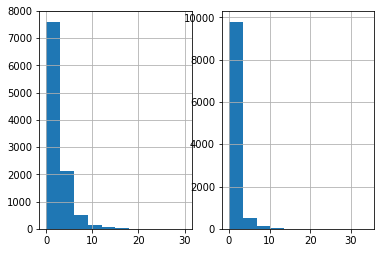

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.subplot(121)
df.ja_singular.hist(ax=ax)
ax=plt.subplot(122)
df.ja_plural.hist(ax=ax)